# **Data Science Workshop**




### Jonathan Ashurov, 211411947
### Nadav Meidan, 200990240

# **Introduction**

We are Jonathan and Nadav are young computer science students who are passionate about data science.
When we were thinking about what project we would like to be doing this semester, we felt a bit overwhelmed by the number of interesting possibilities and directions to go and research in the project.
With our shared knowledge of Reinforcement Learning, as we both did a presentation on the subject during the workshop, we wanted to venture and learn and implement a DRL agent. In addition, it seems that we are experiencing some dramatic days in the stock market and the global economy. So we can dive in with the tools we gained in the workshop and understand the situation better in the stock market, try to detect patterns of previous economic crashes, and maybe develop a tool that helps the average trader to pass through this tough period. 

# **The Problem**

As inflation rises, along with prices for basic utilities and foods, a need for financial support is undisputed.
In this project, we would like to dive into the stock market data, and try to understand the 'big picture':
- Are there any symptoms and indicative signs in the data before a big depression arrives?
- Is there a correlation between changes in the stocks of big companies and certain stock market indexes?
- What is the centralization rate in different economic sectors throughout the years, based on the stock market data?
- What other data can be used as an indicator other than the basic stock prices data?

And after that said, we think as well, that a deep reinforcement learning agent, that trades stocks and generates profit, either for personal use or for shared inventory management, is a great tool for providing financial support and knowledge.
So, we will try some open source models that are out there, discuss their architecture and test them, and hopefully develop one of our own that will face the stock market unexpected (are they?:)) bravely, armed with the knowledge we gained in this project.

# **Data Collection**

### Importing Libraries

In [4]:
################### Imports ##########################################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
# import missingno as msno
# import plotly.graph_objects as go

### Importing Data

Let's first connect to our drive and import our datasets, which contain daily stock prices for a selection of several thousand stock tickers from NYSE and NASDAQ from: https://www.kaggle.com/datasets/ehallmar/daily-historical-stock-prices-1970-2018. 

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

# **Data**

## Our data consists of 2 datasets:

### 1. stocks

#### Features
* Ticker - the sign of the stock 
* Exchange - the stock market where the stock is traded
* Name - the name of the stock
* Sector - the sector of the stock
* Industry - the industry of the stock



### 2. stock_prices

#### Features
* Date - the date of the trading day
* Ticker - the sign of the stock
* Open - the stock's price when the day started
* High - the highest price of the stock that day
* Low - the lowest price of the stock that day
* Close - the stock's price when the day ended
* Adj Close - the adjusted price of the stock after the day ended, it 
reflects the value of the  after accounting for any corporate actions
* Volume - the amount traded that day


In [40]:
plt.rcParams['figure.figsize'] = (10, 10)
# TODO: move down

In [6]:
path = './Datasets/'
stocks = pd.read_csv(path+'historical_stocks.csv')
stock_prices = pd.read_csv(path+'historical_stock_prices.csv')

Let's see a sample of our data to get perspective on it

In [7]:
stocks

,ticker,exchange,name,sector,industry
0,PIH,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS
1,PIHPP,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS
2,TURN,NASDAQ,180 DEGREE CAPITAL CORP.,FINANCE,FINANCE/INVESTORS SERVICES
3,FLWS,NASDAQ,"1-800 FLOWERS.COM, INC.",CONSUMER SERVICES,OTHER SPECIALTY STORES
4,FCCY,NASDAQ,1ST CONSTITUTION BANCORP (NJ),FINANCE,SAVINGS INSTITUTIONS
...,...,...,...,...,...
6455,ZOES,NYSE,"ZOE&#39;S KITCHEN, INC.",CONSUMER SERVICES,RESTAURANTS
6456,ZTS,NYSE,ZOETIS INC.,HEALTH CARE,MAJOR PHARMACEUTICALS
6457,ZTO,NYSE,ZTO EXPRESS (CAYMAN) INC.,TRANSPORTATION,TRUCKING FREIGHT/COURIER SERVICES
6458,ZUO,NYSE,"ZUORA, INC.",TECHNOLOGY,COMPUTER SOFTWARE: PREPACKAGED SOFTWARE


In [8]:
# re-arrange the columns to: date, ticker, open, high, low, close, adj_close, volume
col_list = list(stock_prices)
col_list[0], col_list[1], col_list[2], col_list[3], col_list[4], col_list[5], col_list[6], col_list[7] = col_list[7], col_list[0], col_list[1], col_list[5], col_list[4], col_list[2], col_list[3], col_list[6]
stock_prices=stock_prices.reindex(columns=col_list)

In [9]:
# change the format of the date to datetime
stock_prices['date'] = pd.to_datetime(stock_prices['date'])

In [10]:
# sort the stock prices by date
stock_prices = stock_prices.sort_values(by=['date'])

#TODO: add explanation

In [11]:
stock_prices

,date,ticker,open,high,low,close,adj_close,volume
4285669,1970-01-02,XOM,1.929688,1.937500,1.925781,1.937500,0.025623,1174400
14184994,1970-01-02,AA,7.140915,7.225020,7.140915,7.140915,1.986261,22500
15384996,1970-01-02,BA,0.925926,0.979424,0.925926,0.979424,0.229325,634400
18215303,1970-01-02,DIS,0.688281,0.689565,0.683144,0.683144,0.282199,1109700
18189682,1970-01-02,PG,1.710938,1.722656,1.708984,1.718750,0.020346,832000
...,...,...,...,...,...,...,...,...
8401737,2018-08-24,INST,38.200001,39.150002,38.200001,39.099998,39.099998,240400
8400366,2018-08-24,SQQQ,12.120000,12.120000,11.870000,11.890000,11.890000,13058000
8392730,2018-08-24,PBFX,21.799999,21.850000,21.500000,21.600000,21.600000,87000
8414092,2018-08-24,POPE,73.000000,73.000000,73.000000,73.000000,73.000000,1100


In the future we would like to create a DRL agent that is cappable of trading stock and generating profits, for now lets isolate Apple's stock for it's future training.

In [12]:
apple_df = stock_prices.loc[stock_prices["ticker"] == 'AAPL']
apple_df

,date,ticker,open,high,low,close,adj_close,volume
948,1980-12-12,AAPL,0.513393,0.515625,0.513393,0.513393,0.023186,117258400
960,1980-12-15,AAPL,0.488839,0.488839,0.486607,0.486607,0.021977,43971200
968,1980-12-16,AAPL,0.453125,0.453125,0.450893,0.450893,0.020364,26432000
980,1980-12-17,AAPL,0.462054,0.464286,0.462054,0.462054,0.020868,21610400
988,1980-12-18,AAPL,0.475446,0.477679,0.475446,0.475446,0.021473,18362400
...,...,...,...,...,...,...,...,...
100491,2018-08-20,AAPL,218.100006,219.179993,215.110001,215.460007,215.460007,30287700
100492,2018-08-21,AAPL,216.800003,217.190002,214.029999,215.039993,215.039993,26159800
100493,2018-08-22,AAPL,214.100006,216.360001,213.839996,215.050003,215.050003,19018100
100494,2018-08-23,AAPL,214.649994,217.050003,214.600006,215.490005,215.490005,18883200


# **Exploratory Data Analysis**

We have 6460 companies in our stocks market data , and we can visualise the division of the sectors of those companies. In addition, 1440 companies doesn't related to any sector. Moreover, the biggest sector is the "Finance" sector.

In [13]:
stocks.describe()

,ticker,exchange,name,sector,industry
count,6460,6460,6460,5020,5020
unique,6460,2,5462,13,136
top,AMH^F,NASDAQ,BANK OF AMERICA CORPORATION,FINANCE,MAJOR PHARMACEUTICALS
freq,1,3308,16,1022,419


In [14]:
frames = [stocks['sector'].value_counts(), 100 * round(stocks['sector'].value_counts(normalize=True), 2)]
division = pd.concat(frames, axis=1, keys=('counts','percentage'))
division

,counts,percentage
FINANCE,1022,20.0
CONSUMER SERVICES,796,16.0
HEALTH CARE,784,16.0
TECHNOLOGY,607,12.0
CAPITAL GOODS,352,7.0
ENERGY,286,6.0
PUBLIC UTILITIES,273,5.0
BASIC INDUSTRIES,272,5.0
CONSUMER NON-DURABLES,224,4.0
CONSUMER DURABLES,144,3.0


<AxesSubplot:ylabel='sector'>

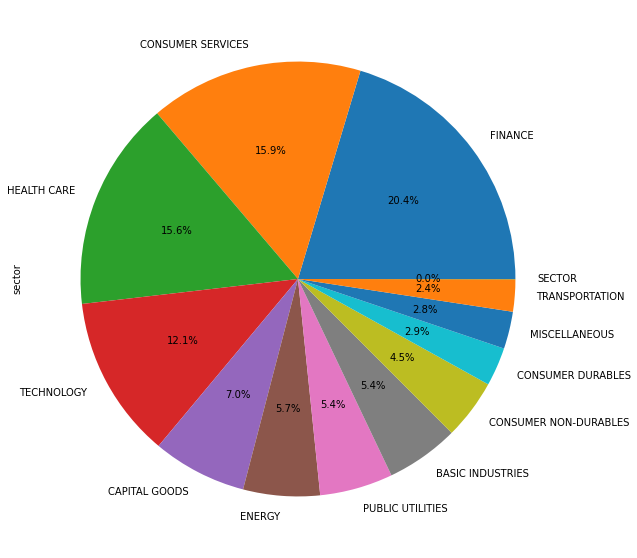

In [56]:
stocks['sector'].value_counts().plot(kind='pie', autopct='%0.1f%%')

In [16]:
nulls = stocks.isnull().sum()
nulls

ticker         0
exchange       0
name           0
sector      1440
industry    1440
dtype: int64

We can also see that almost half of our stocks come from NASDAQ, and half from NYSE

<AxesSubplot:ylabel='exchange'>

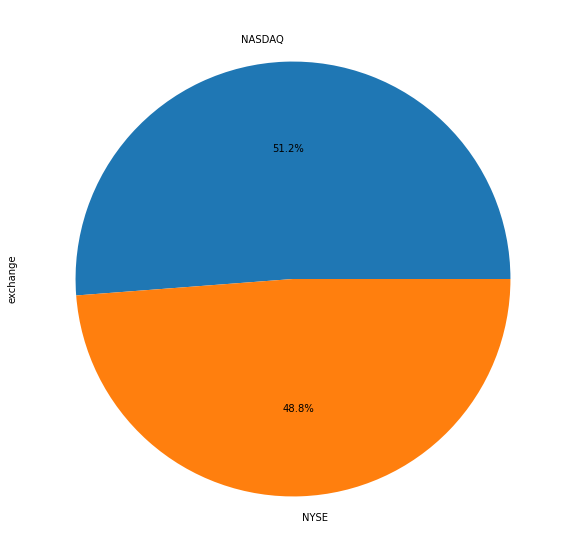

In [37]:
stocks['exchange'].value_counts().plot.pie(figsize=(10, 10), autopct='%0.1f%%')

Now, lets choose a decade of historical stock quotes (2008-2018), and discover the avg profit percentage in each sector in that decade.

In [18]:
# we first isolate the last decade
from datetime import datetime
lower = datetime(2008,1,1)
decade = stock_prices[stock_prices['date'] >= lower]
decade_apple = decade[decade['ticker'] == 'AAPL']
decade.sort_values(by=['date'])

,date,ticker,open,high,low,close,adj_close,volume
4071470,2008-01-02,PKX,149.039993,151.100006,144.289993,146.460007,112.631989,575000
5795122,2008-01-02,POWL,43.910000,44.509998,42.950001,43.279999,37.520672,43100
10312925,2008-01-02,PNK,23.440001,23.740000,22.100000,22.360001,22.360001,765600
7633796,2008-01-02,ACC,26.910000,26.910000,25.910000,26.309999,16.807518,153900
16550292,2008-01-02,ETH,28.670000,28.709999,27.709999,28.049999,22.107101,466600
...,...,...,...,...,...,...,...,...
13159329,2018-08-24,WRK,55.240002,55.610001,55.070000,55.400002,55.400002,1689700
13161192,2018-08-24,PRMW,20.070000,20.430000,20.040001,20.190001,20.190001,343300
13165290,2018-08-24,CIB,43.500000,44.730000,43.500000,44.529999,44.529999,1117200
16231119,2018-08-24,MYRG,35.139999,35.860001,34.750000,35.060001,35.060001,96000


In [19]:
# these are the starting price of all our stock that decade
starting_prices = decade.groupby(['ticker'])[['date', 'open']].min()

,date,open
ticker,,
A,2008-01-02,8.912732
AA,2008-01-02,12.495600
AABA,2008-01-02,9.100000
AAC,2018-01-16,7.960000
AAL,2008-01-02,1.810000
...,...,...
ZTS,2013-02-01,28.480000
ZUMZ,2008-01-02,5.790000
ZUO,2018-04-12,19.230000


In [20]:
# and this is the last price of our stock in that decade
ending_prices = decade.groupby(['ticker'])[['date', 'open']].max()

,date,open
ticker,,
A,2018-08-24,74.940002
AA,2018-08-24,105.924240
AABA,2018-08-24,81.769997
AAC,2018-08-24,12.920000
AAL,2018-08-24,58.790001
...,...,...
ZTS,2018-08-24,93.370003
ZUMZ,2018-08-24,41.540001
ZUO,2018-08-24,36.060001


We can now calculate the profit for each stock that decade, and get a table of profits. We will then union the profits table to the table "stocks", and find the average profit for each sector.

In [21]:
profits = (ending_prices['open'] / starting_prices['open']) # calculate profit by precentage of gain (in decimal numbers)
profits = profits.reset_index() # index by number, and not by tickers
profits.columns = ['ticker', 'profit'] # rename columns
profits

,ticker,profit
0,A,8.408196
1,AA,8.476923
2,AABA,8.985714
3,AAC,1.623116
4,AAL,32.480665
...,...,...
5680,ZTS,3.278441
5681,ZUMZ,7.174439
5682,ZUO,1.875195
5683,ZYME,3.441680


<AxesSubplot:xlabel='ticker'>

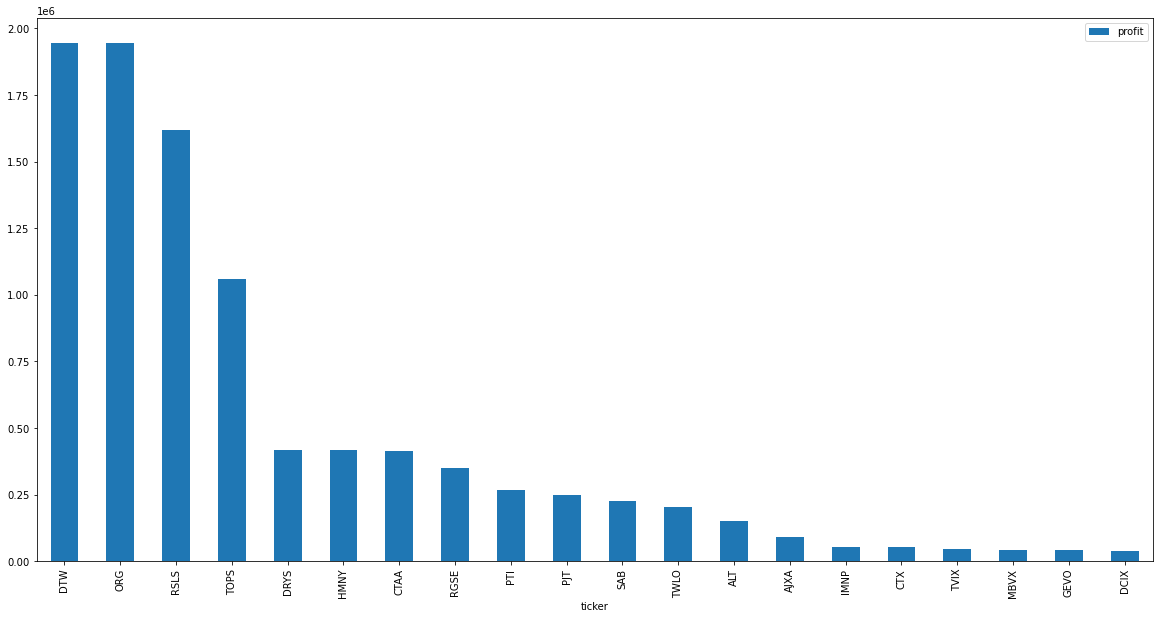

In [44]:
profits.sort_values(by=['profit'], ascending=False)[:20].plot.bar(figsize=(20,10), x='ticker', y='profit')

Most of the companies made a profit, some multiplied their value by a scale of Milions, to be percise "DTW" and "ORG" grew by about 1,800,000 times.
#TODO: investigate the profitable companies

In [23]:
union = profits.merge(stocks, left_on=['ticker'], right_on=['ticker'], how='inner') # merge "profits" table and "stocks" table by ticker
union

,ticker,profit,exchange,name,sector,industry
0,A,8.408196,NYSE,"AGILENT TECHNOLOGIES, INC.",CAPITAL GOODS,BIOTECHNOLOGY: LABORATORY ANALYTICAL INSTRUMENTS
1,AA,8.476923,NYSE,ALCOA CORPORATION,BASIC INDUSTRIES,ALUMINUM
2,AABA,8.985714,NASDAQ,ALTABA INC.,TECHNOLOGY,EDP SERVICES
3,AAC,1.623116,NYSE,"AAC HOLDINGS, INC.",HEALTH CARE,MEDICAL SPECIALITIES
4,AAL,32.480665,NASDAQ,"AMERICAN AIRLINES GROUP, INC.",TRANSPORTATION,AIR FREIGHT/DELIVERY SERVICES
...,...,...,...,...,...,...
5680,ZTS,3.278441,NYSE,ZOETIS INC.,HEALTH CARE,MAJOR PHARMACEUTICALS
5681,ZUMZ,7.174439,NASDAQ,ZUMIEZ INC.,CONSUMER SERVICES,CLOTHING/SHOE/ACCESSORY STORES
5682,ZUO,1.875195,NYSE,"ZUORA, INC.",TECHNOLOGY,COMPUTER SOFTWARE: PREPACKAGED SOFTWARE
5683,ZYME,3.441680,NYSE,ZYMEWORKS INC.,HEALTH CARE,MAJOR PHARMACEUTICALS


In [24]:
avg_profits_per_sector = union.groupby(['sector'])[['sector', 'profit']].mean()
avg_profits_per_sector.sort_values(by=['profit'])

,profit
sector,
CONSUMER NON-DURABLES,20.353550
CAPITAL GOODS,38.402426
MISCELLANEOUS,121.307184
ENERGY,197.881229
CONSUMER DURABLES,240.453058
FINANCE,393.150369
TECHNOLOGY,451.517756
CONSUMER SERVICES,820.717979
BASIC INDUSTRIES,1540.692532


#TODO: להרחיב על העובדה שהחברות הטכנולוגיות לא צמחו כמו שציפינו
להרחיב על כל סקטור

<AxesSubplot:xlabel='sector'>

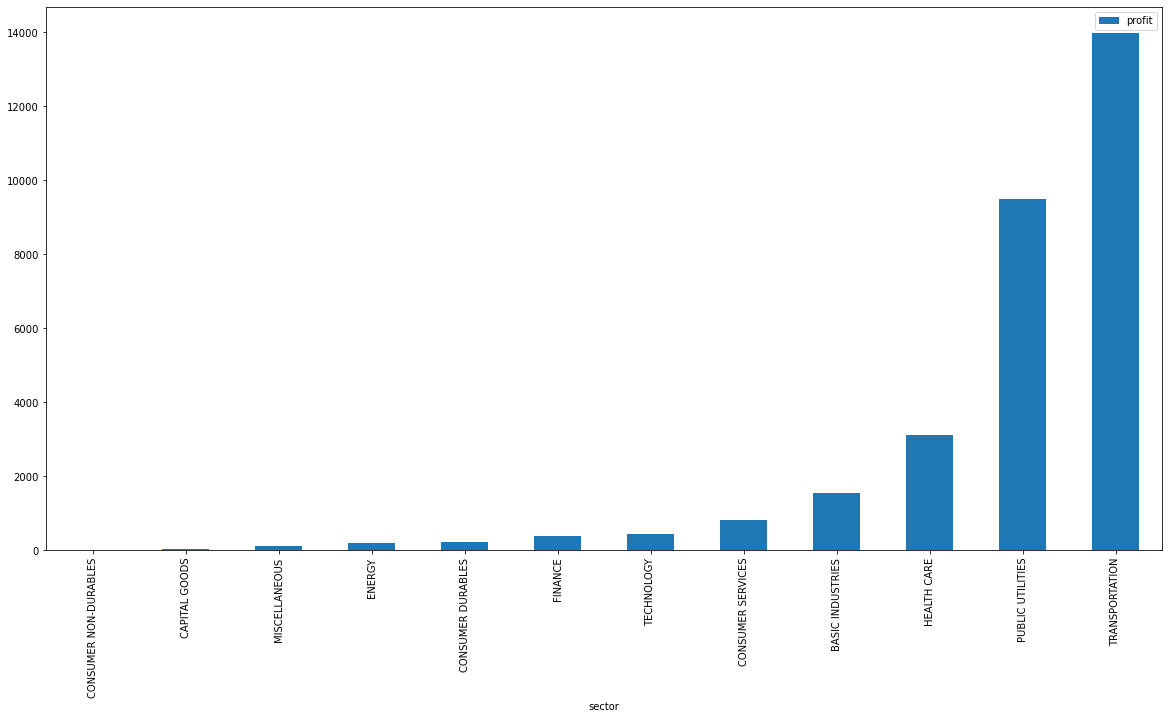

In [45]:
avg_profits_per_sector.sort_values(by=['profit']).plot.bar(figsize=(20,10), )

And now we can see, that in avg the "Transportation" sector is the most profitable sector, between the year 2008-2018, followed by "Public Utilities", and "Health Care".

# **Financial Analysis**

The stock market is categorized by whether it is thriving or depressed, the direction it goes towards, its trends, and how investors behave in it.

When the market is seen by investors as optimistic, and there are expectations that strong results should continue for an extended period, the stock market is called a "Bull Market".

In addition there are "Bear Markets", they are characterized by investors' pessimism and low confidence. During a bear market, investors often seem to ignore any good news and continue selling quickly, pushing prices even lower.

One technical indicator investors use to assess the state of the market is a moving average (MA). A moving average of **X** days is an average of the price of a stock in the last **X** days for each day, that is graphed with the stock's graph or seperatly.

Let's plot some moving averages of the last 10, 50, 200, and 500 days for the stock AAPL:

In [26]:
decade_apple = decade_apple.set_index('date')

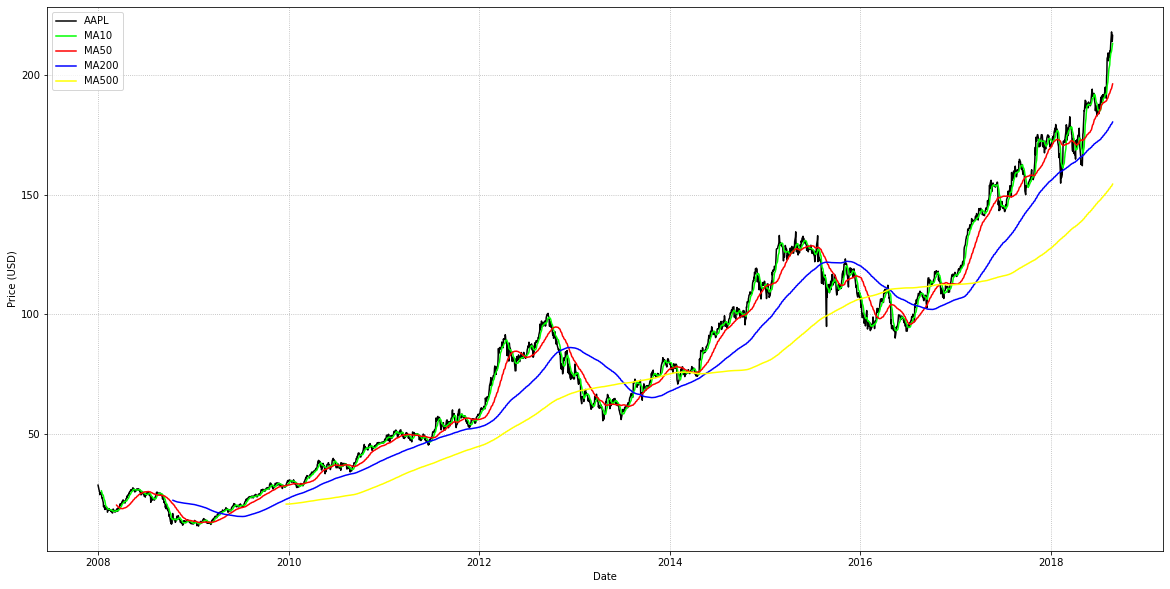

In [27]:
# we plot here the prices of AAPL, its ma10, ma50, ma200, ma50 and the intersections of ma50 and ma200
prices = decade_apple['open']
moving_average10 = prices.rolling(window=10).mean()
moving_average50 = prices.rolling(window=50).mean()
moving_average200 = prices.rolling(window=200).mean()
moving_average500 = prices.rolling(window=500).mean()

plt.figure(figsize=(20, 10))
plt.plot(prices, 'k-', label='AAPL') # plots prices of AAPL in black
plt.plot(moving_average10, '#00ff00', label='MA10') # plots MA10 in green
plt.plot(moving_average50, 'r-', label='MA50') # plots MA50 in red
plt.plot(moving_average200, 'b-', label='MA200') # plots MA200 in blue
plt.plot(moving_average500, '#ffff00', label='MA500') # plots MA500 in yellow
plt.ylabel('Price (USD)')
plt.xlabel('Date')
plt.grid(linestyle=':')
plt.legend(loc='upper left')
plt.show()

We can see that generally when the stock price goes up, the moving averages are usually lower then the actuall price, as they are catching up and also growing. Also, we can see that the bigger averages take longer to catch up, as they take into account more days.

TODO: explain the intersection of ma50 & ma200

In [28]:
# calculates the intersections of 2 MA's by finding when the difference between them changes sign (from positive to negative an vice versa)
def find_intersections(ma1, ma2):
  sign = lambda x: math.copysign(1, x)
  dates = []
  values = []
  for i in range(min(len(ma1), len(ma2))):
    if i + 1 < min(len(ma1), len(ma2)) and sign(ma1[ma1.index[i]] - ma2[ma1.index[i]]) == sign(-(ma1[ma1.index[i+1]] - ma2[ma1.index[i+1]])):
      dates.append(ma1.index[i])
      values.append(ma1[ma1.index[i]])
  return dates, values

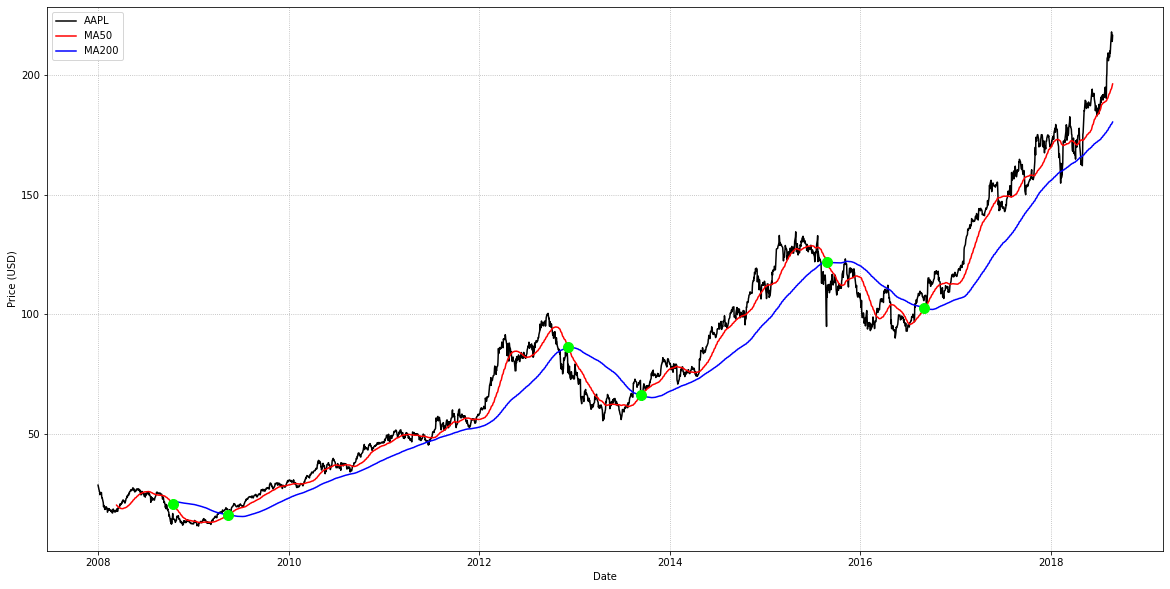

In [29]:

# we plot here the prices of AAPL, its ma10, ma50, ma200, ma50 and the intersections of ma50 and ma200
prices = decade_apple['open']
intersections = find_intersections(moving_average50, moving_average200)

plt.figure(figsize=(20, 10))
plt.plot(prices, 'k-', label='AAPL') # plots prices of AAPL in black
plt.plot(moving_average50, 'r-', label='MA50') # plots MA50 in red
plt.plot(moving_average200, 'b-', label='MA200') # plots MA200 in blue
plt.scatter(intersections[0], intersections[1], c=['#00ff00'], s=100, zorder=10) # plots intersection of MA50 and MA200 in green
plt.ylabel('Price (USD)')
plt.xlabel('Date')
plt.grid(linestyle=':')
plt.legend(loc='upper left')
plt.show()

In [30]:
decade_apple_2 = decade_apple.drop(['adj_close', 'ticker', 'volume'], axis=1)
decade_apple_2
decade_apple = decade_apple.reset_index() # index by number, and not by date
# cols_plot = ['open', 'close', 'high','low']
# axes = decade_apple_2.plot(x = 'date', y = cols_plot, figsize=(11, 9), subplots=True, title = 'Apple stock rate, 2008-2018')
# for ax in axes:
#     ax.set_ylabel('Daily trade')


# **Algorithms Comparisons**

In [46]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import RNN
from keras.layers import Dropout
from keras.layers import *
from keras.callbacks import EarlyStopping
from math import sqrt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

<ipython-input-47-7f3cc809d072>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  hist=decade_apple.hist(ax = ax)


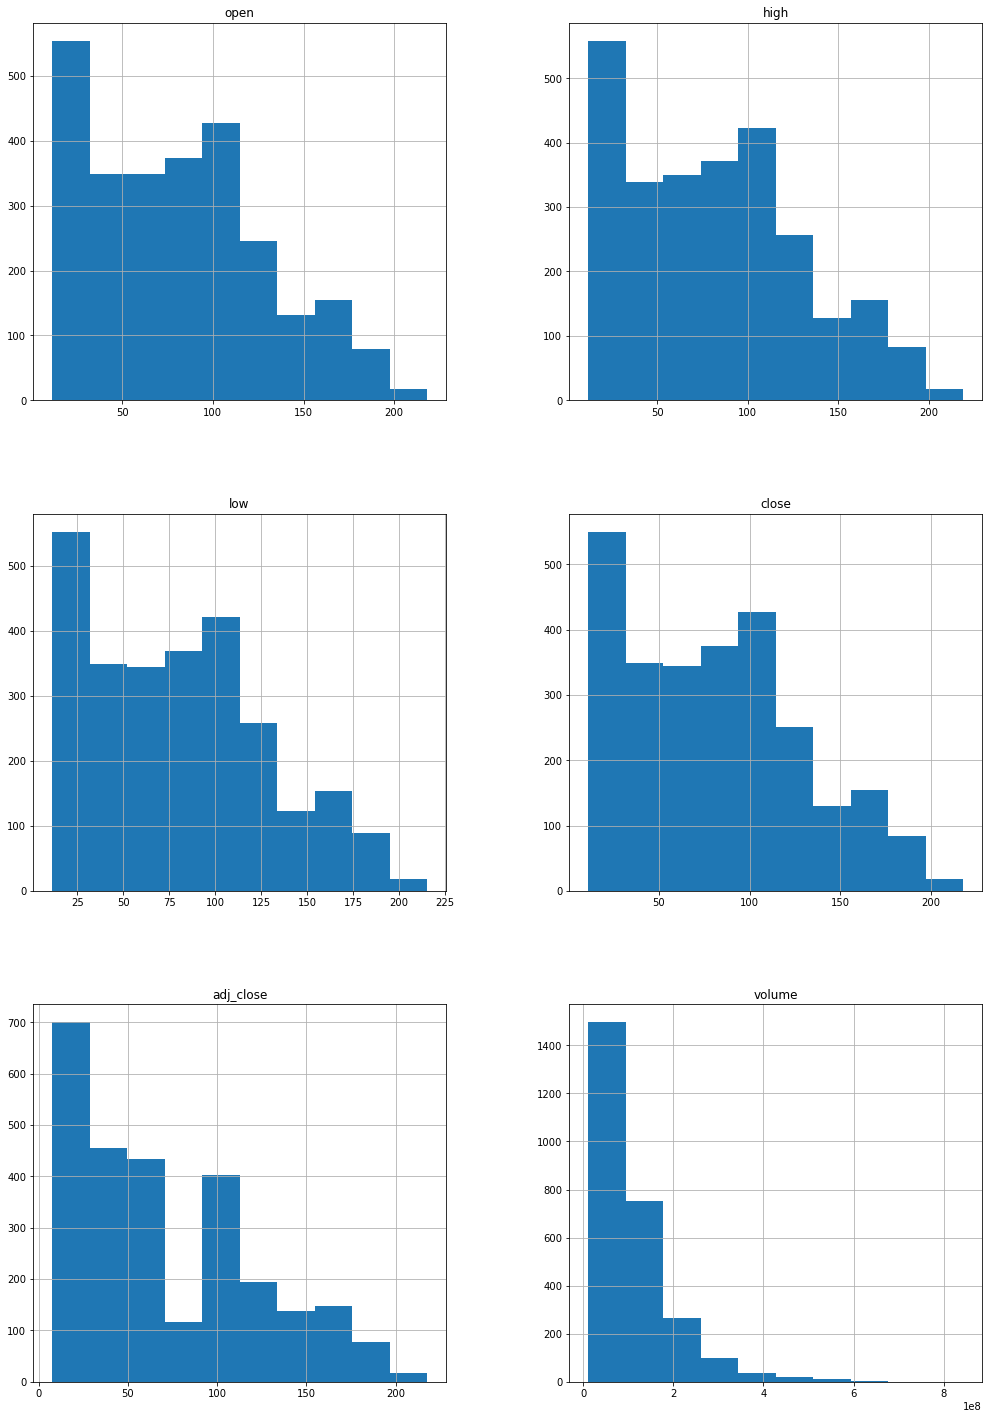

In [47]:
fig = plt.figure(figsize = (17,25))
ax = fig.gca()
hist=decade_apple.hist(ax = ax)
#TODO: Add documentation

**LSTM stock price prediction model**

Predicting the closing price stock price of APPLE inc, during the 2008-2018 decade:

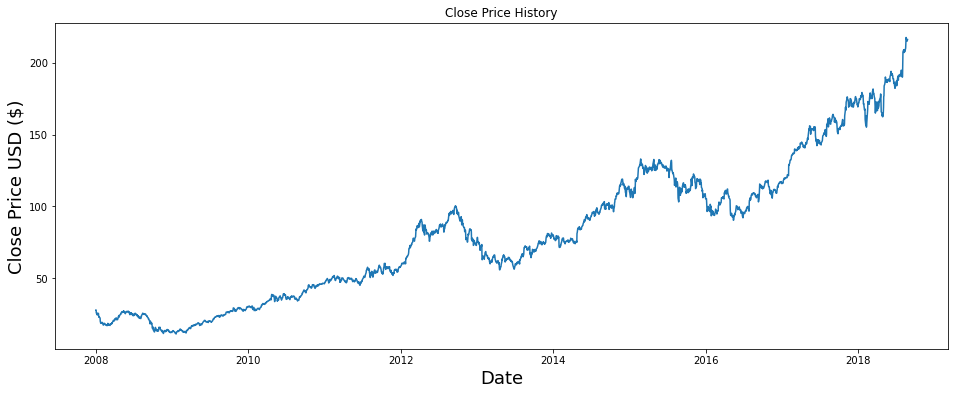

In [48]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(decade_apple['date'], decade_apple['close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [49]:
# Create a new dataframe with only the 'close column 
data = decade_apple.filter(['close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2548

In [50]:
# Normalise the data 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.08072754],
       [0.08078983],
       [0.07049125],
       ...,
       [0.98774276],
       [0.98987447],
       [0.99312045]])

In [51]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.08072754, 0.08078983, 0.07049125, 0.06882327, 0.0644007 ,
       0.07004138, 0.06908628, 0.06539734, 0.06961228, 0.06287114,
       0.05636532, 0.05723046, 0.05755574, 0.05359689, 0.04212865,
       0.03972704, 0.03585814, 0.03585814, 0.03691708, 0.03736002,
       0.03956093, 0.03844663, 0.0369932 , 0.03540827, 0.03031436,
       0.02978835, 0.03272289, 0.03547056, 0.03229379, 0.03543596,
       0.03409326, 0.0321346 , 0.03043894, 0.03157399, 0.02999599,
       0.0285564 , 0.02875019, 0.02834185, 0.03097878, 0.03578893,
       0.03240453, 0.03012748, 0.03212768, 0.03203771, 0.0295738 ,
       0.03048738, 0.02871559, 0.03401714, 0.03310355, 0.03442548,
       0.03350498, 0.03358803, 0.03780297, 0.03562283, 0.03811442,
       0.04244702, 0.04345057, 0.04627438, 0.04294534, 0.04485556])]
[0.045194689237894166]

[array([0.08072754, 0.08078983, 0.07049125, 0.06882327, 0.0644007 ,
       0.07004138, 0.06908628, 0.06539734, 0.06961228, 0.06287114,
       0.05636532, 0.05723046, 0.0

In [52]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2488/2488 [==============================] - 42s 16ms/step - loss: 9.1110e-04


In [53]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 14ms/step


8.469844556034376

<ipython-input-54-a8390cc4b87c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


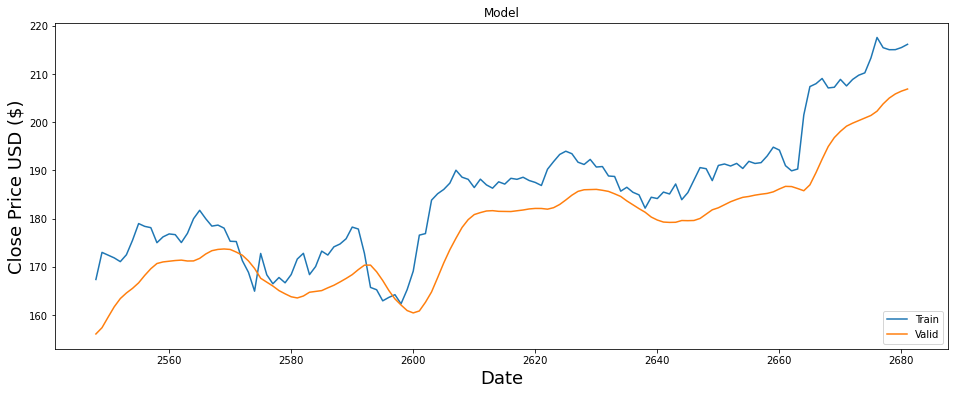

In [54]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
# plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'Valid', 'Predictions'], loc='lower right')
plt.show()

#TODO: reindex by date

In [55]:
# Show the valid and predicted prices
valid

,close,Predictions
2548,167.369995,156.063202
2549,172.990005,157.364838
2550,172.429993,159.555145
2551,171.850006,161.693924
2552,171.070007,163.408432
...,...,...
2677,215.460007,203.794357
2678,215.039993,205.004272
2679,215.050003,205.863159
2680,215.490005,206.446533


# **Future Plans**

To be honest - we were quite overwhelmed with the amount of data we met. Expecially in recent years - stock trading has become super technological area where data science, autonumus models and analytics takes significant place. All that creates a lot of data to work with. We Are planning on keep and exploring the data, found new correlations, use shelf-algorithms to describe some non-trivial connections and hopefully build, after researching and comparing few methdologies and models, an agent/mpdel/tool that will benefit from the data we discovered and will do well on the trades market.
We would like to invovlve some other meaningful data other than the trivial open/close/high/low data. we thought about public sentiment regarding companies, elections periods, poolitical crisis, etc. and try to measure their impact on the market.
We would like to get to know new tools and ideas, connections and patterns - and we would like your guidance.